# IMDB Data Classification with Tensorflow

In [ ]:
import tensorflow as tf
tf.__version__

'2.7.0'

## Loading libraries and datasets

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models, layers, optimizers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

## A Look at Data we got

In [ ]:
print("Words: ", train_data[2])
print("Labels: ", train_labels[2])

Words:  [1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5974, 54, 61, 369, 13, 71, 149, 14, 22, 112, 4, 2401, 311, 12, 16, 3711, 33, 75, 43, 1829, 296, 4, 86, 320, 35, 534, 19, 263, 4821, 1301, 4, 1873, 33, 89, 78, 12, 66, 16, 4, 360, 7, 4, 58, 316, 334, 11, 4, 1716, 43, 645, 662, 8, 257, 85, 1200, 42, 1228, 2578, 83, 68, 3912, 15, 36, 165, 1539, 278, 36, 69, 2, 780, 8, 106, 14, 6905, 1338, 18, 6, 22, 12, 215, 28, 610, 40, 6, 87, 326, 23, 2300, 21, 23, 22, 12, 272, 40, 57, 31, 11, 4, 22, 47, 6, 2307, 51, 9, 170, 23, 595, 116, 595, 1352, 13, 191, 79, 638, 89, 2, 14, 9, 8, 106, 607, 624, 35, 534, 6, 227, 7, 129, 113]
Labels:  0


In [ ]:
# We can access words followed by the above indexes by calling get_word_index
# which returns a dictionary of words and their indexes
word_index = imdb.get_word_index()
reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])
" ".join([ reversed_word_index.get(i-3, "?") for i in train_data[2]])

"? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life"

## Preparing Dataset

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train.shape

(25000, 10000)

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

y_train.shape

(25000,)

## Building Model

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# Spliting data further for validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

x_val.shape

(10000, 10000)

In [ ]:
model.compile(optimizer='rmsprop', loss=tf.keras.losses.binary_crossentropy, metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 2s 44ms/step - loss: 0.0096 - acc: 0.9977 - val_loss: 0.7502 - val_acc: 0.8634
Epoch 2/4
30/30 [==============================] - 1s 35ms/step - loss: 0.0019 - acc: 0.9999 - val_loss: 0.7928 - val_acc: 0.8617
Epoch 3/4
30/30 [==============================] - 1s 35ms/step - loss: 0.0051 - acc: 0.9985 - val_loss: 0.8285 - val_acc: 0.8625
Epoch 4/4
30/30 [==============================] - 1s 34ms/step - loss: 9.6127e-04 - acc: 1.0000 - val_loss: 0.8498 - val_acc: 0.8615


In [ ]:
print(model.summary)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fb2e8e49310>>


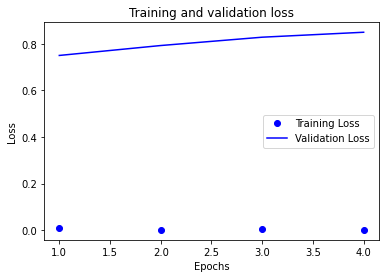

<function matplotlib.pyplot.show>

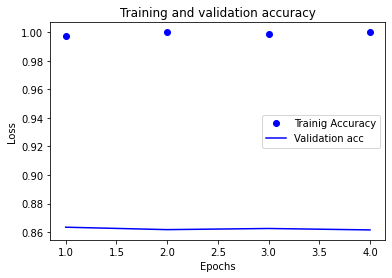

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Trainig Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show

## Model Evaluation

In [ ]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.9228 - acc: 0.8478


[0.9227567911148071, 0.8478000164031982]